In [34]:
# imports

import panel as pn
pn.extension('plotly')
import plotly.express as px
import pandas as pd
import hvplot.pandas
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path
from dotenv import load_dotenv
#from data_collection import get_crypo_from_API

import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.2f}'.format

## Crypto Data

In [106]:
#Read the crypto data into a Pandas DataFrame

Euthereum_data = pd.read_csv(Path("Resources/ETH-USD.csv"), index_col='Date')
Doge_data = pd.read_csv(Path("Resources/DOGE-USD.csv"), index_col='Date')
Bitcoin_data = pd.read_csv(Path("Resources/BTC-USD.csv"), index_col='Date')
Sushi_data = pd.read_csv(Path("Resources/SUSHI-USD.csv"), index_col='Date')
Tether_data = pd.read_csv(Path("Resources/USDT-USD.csv"), index_col='Date')

Euthereum_data['ticker']='ETH'
Doge_data['ticker']='DOGE'
Bitcoin_data['ticker']='BTC'
Sushi_data['ticker']='SUSHI'
Tether_data['ticker']='USDT'

volume_data=pd.concat([Euthereum_data,Bitcoin_data,Doge_data,Sushi_data,Tether_data],axis='rows').loc[:,['Volume','ticker']].dropna()
volume_data.reset_index(inplace=True)
volume_data.head()




,Date,Volume,ticker
0,2020-10-06,11497841885.00,ETH
1,2020-10-07,10537119715.00,ETH
2,2020-10-08,11511016796.00,ETH
3,2020-10-10,13618484324.00,ETH
4,2020-10-11,12584512533.00,ETH


## Data Cleaning

In [107]:
Euthereum_data.columns = ['ETH Open', 'ETH High', 'ETH Low', 'ETH Close', 'ETH Adj Close', 'ETH Volume','ticker']
Doge_data.columns = ['DOGE Open', 'DOGE High', 'DOGE Low', 'DOGE Close', 'DOGE Adj Close', 'DOGE Volume','ticker']
Bitcoin_data.columns = ['BTC Open', 'BTC High', 'BTC Low', 'BTC Close', 'BTC Adj Close', 'BTC Volume','ticker'] 
Sushi_data.columns = ['SUSHI Open', 'SUSHI High', 'SUSHI Low', 'SUSHI Close', 'SUSHI Adj Close', 'SUSHI Volume','ticker'] 
Tether_data.columns = ['USDT Open', 'USDT High', 'USDT Low', 'USDT Close', 'USDT Adj Close', 'USDT Volume','ticker'] 
Tether_data.head()

,USDT Open,USDT High,USDT Low,USDT Close,USDT Adj Close,USDT Volume,ticker
Date,,,,,,,
2020-10-06,1.00,1.01,1.00,1.00,1.00,36772723041.00,USDT
2020-10-07,1.00,1.01,1.00,1.00,1.00,28509871425.00,USDT
2020-10-08,1.00,1.01,0.99,1.00,1.00,33458865269.00,USDT
2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN,USDT
2020-10-10,1.00,1.00,1.00,1.00,1.00,41298643279.00,USDT


In [112]:
Bitcoin_data['Total Traded'] = Bitcoin_data['BTC Open'] * Bitcoin_data['BTC Volume']
Bitcoin_data.dropna(inplace=True)
#Bitcoin_data.drop(columns='ticker', inplace=True)
 
Euthereum_data['Total Traded'] = Euthereum_data['ETH Open'] * Euthereum_data['ETH Volume']
Euthereum_data.dropna(inplace=True)
#Euthereum_data.drop(columns='ticker', inplace=True)
 
Doge_data['Total Traded'] = Doge_data['DOGE Open'] * Doge_data['DOGE Volume']
Doge_data.dropna(inplace=True)
#Doge_data.drop(columns='ticker', inplace=True)
 
Sushi_data['Total Traded'] = Sushi_data['SUSHI Open'] * Sushi_data['SUSHI Volume']
Sushi_data.dropna(inplace=True)
#Sushi_data.drop(columns='ticker', inplace=True)
 
Tether_data['Total Traded'] = Tether_data['USDT Open'] * Tether_data['USDT Volume']
Tether_data.dropna(inplace=True)
#Tether_data.drop(columns='ticker', inplace=True)

Trade_data=pd.concat([Euthereum_data,Bitcoin_data,Doge_data,Sushi_data,Tether_data],axis='rows').loc[:,['Total Traded','ticker']].dropna()
Trade_data.reset_index(inplace=True)
Trade_data.head()





,Date,Total Traded,ticker
0,2020-10-06,4071820280429.81,ETH
1,2020-10-07,3594123813264.87,ETH
2,2020-10-08,3937860957008.13,ETH
3,2020-10-10,4976227755171.94,ETH
4,2020-10-11,4667953551688.09,ETH


In [37]:
Crypto_data = pd.concat([Euthereum_data, Doge_data, Bitcoin_data, Sushi_data, Tether_data], axis="columns", join="inner")
Crypto_data.head(5)

,ETH Open,ETH High,ETH Low,ETH Close,ETH Adj Close,ETH Volume,ticker,DOGE Open,DOGE High,DOGE Low,DOGE Close,DOGE Adj Close,DOGE Volume,ticker,BTC Open,BTC High,BTC Low,BTC Close,BTC Adj Close,BTC Volume,ticker,SUSHI Open,SUSHI High,SUSHI Low,SUSHI Close,SUSHI Adj Close,SUSHI Volume,ticker,USDT Open,USDT High,USDT Low,USDT Close,USDT Adj Close,USDT Volume,ticker
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-06,354.14,355.50,338.52,341.02,341.02,11497841885.00,ETH,0.00,0.00,0.00,0.00,0.00,31952344.00,DOGE,10799.78,10803.46,10565.20,10621.66,10621.66,22264958686.00,BTC,0.84,0.85,0.63,0.64,0.64,104892741.00,SUSHI,1.00,1.01,1.00,1.00,1.00,36772723041.00,USDT
2020-10-07,341.09,342.59,335.53,342.12,342.12,10537119715.00,ETH,0.00,0.00,0.00,0.00,0.00,43259079.00,DOGE,10619.80,10687.27,10591.96,10679.14,10679.14,17634388529.00,BTC,0.64,0.68,0.56,0.68,0.68,98808584.00,SUSHI,1.00,1.01,1.00,1.00,1.00,28509871425.00,USDT
2020-10-08,342.09,352.80,336.50,351.46,351.46,11511016796.00,ETH,0.00,0.00,0.00,0.00,0.00,43957899.00,DOGE,10677.62,10939.80,10569.82,10923.63,10923.63,21962121001.00,BTC,0.68,0.80,0.60,0.77,0.77,104304531.00,SUSHI,1.00,1.01,0.99,1.00,1.00,33458865269.00,USDT
2020-10-09,NaN,NaN,NaN,NaN,NaN,NaN,ETH,NaN,NaN,NaN,NaN,NaN,NaN,DOGE,NaN,NaN,NaN,NaN,NaN,NaN,BTC,NaN,NaN,NaN,NaN,NaN,NaN,SUSHI,NaN,NaN,NaN,NaN,NaN,NaN,USDT
2020-10-10,365.40,378.27,365.35,370.97,370.97,13618484324.00,ETH,0.00,0.00,0.00,0.00,0.00,96632426.00,DOGE,11059.14,11442.21,11056.94,11296.36,11296.36,22877978588.00,BTC,0.83,0.87,0.74,0.75,0.75,91958008.00,SUSHI,1.00,1.00,1.00,1.00,1.00,41298643279.00,USDT


In [8]:
Crypto_data = Crypto_data.dropna()
Crypto_data.head(2)

,ETH Open,ETH High,ETH Low,ETH Close,ETH Adj Close,ETH Volume,DOGE Open,DOGE High,DOGE Low,DOGE Close,DOGE Adj Close,DOGE Volume,BTC Open,BTC High,BTC Low,BTC Close,BTC Adj Close,BTC Volume,SUSHI Open,SUSHI High,SUSHI Low,SUSHI Close,SUSHI Adj Close,SUSHI Volume,USDT Open,USDT High,USDT Low,USDT Close,USDT Adj Close,USDT Volume
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2020-10-06,354.137787,355.504059,338.520233,341.021149,341.021149,1.149784e+10,0.002625,0.002637,0.002590,0.00261,0.00261,31952344.0,10799.778320,10803.456055,10565.197266,10621.664063,10621.664063,2.226496e+10,0.844712,0.850459,0.631603,0.639903,0.639903,104892741.0,1.001631,1.006395,0.996538,1.001835,1.001835,3.677272e+10
2020-10-07,341.091675,342.591248,335.533600,342.119781,342.119781,1.053712e+10,0.002610,0.002613,0.002586,0.00260,0.00260,43259079.0,10619.803711,10687.268555,10591.963867,10679.136719,10679.136719,1.763439e+10,0.640413,0.676495,0.556391,0.676495,0.676495,98808584.0,1.001684,1.006026,0.999334,1.000901,1.000901,2.850987e+10


<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

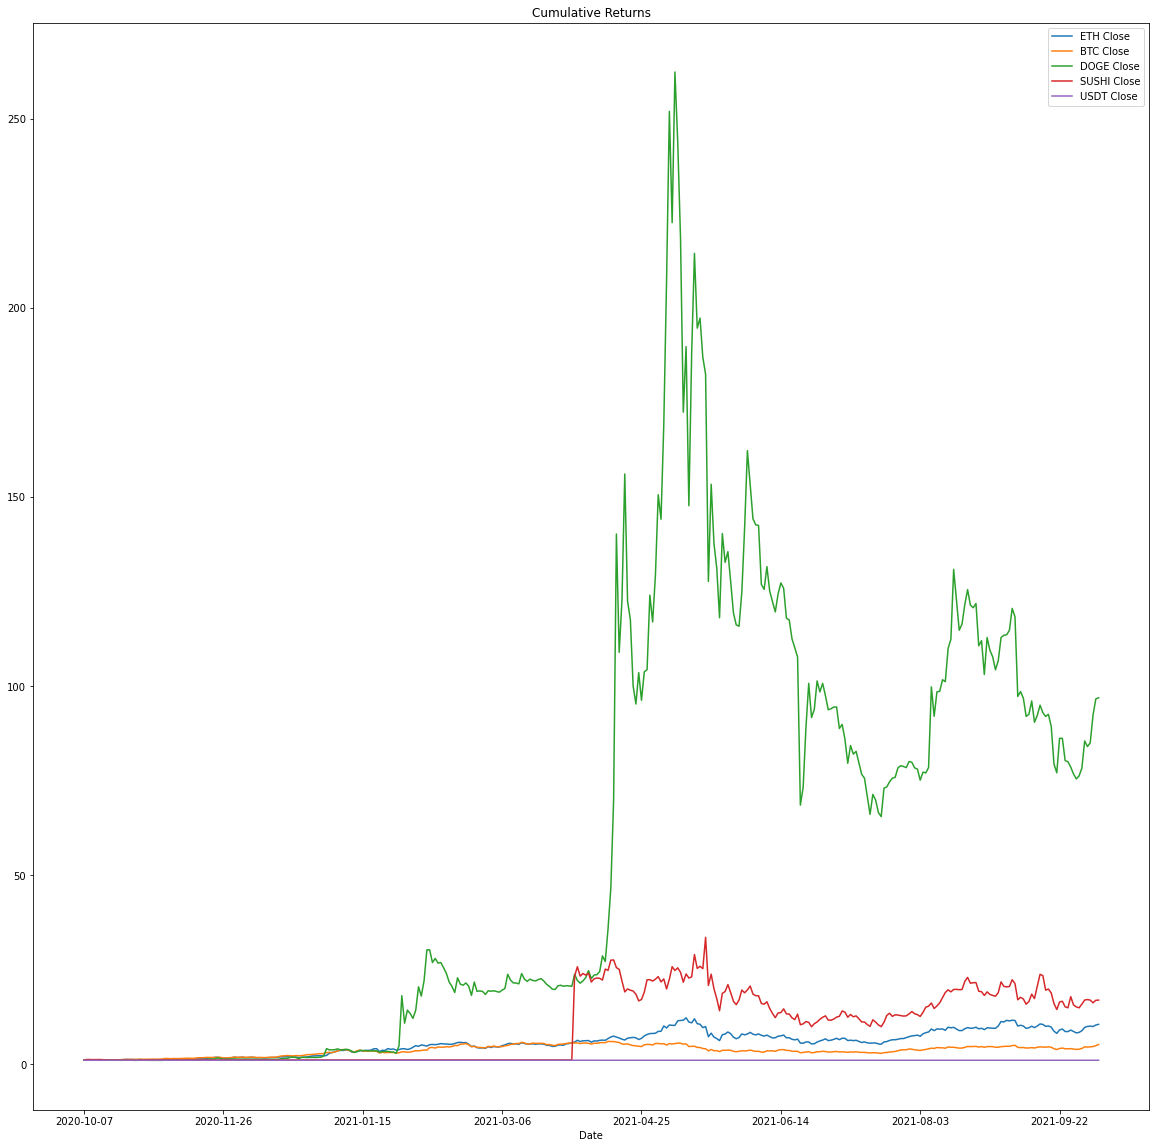

In [117]:
Crypto_Daily_Returns=Crypto_data[['ETH Close','BTC Close','DOGE Close','SUSHI Close','USDT Close']].pct_change().dropna()
(1+Crypto_Daily_Returns).cumprod().plot(figsize=(20, 20), title="Cumulative Returns")

In [10]:
Crypto_Daily_Returns.std().sort_values(ascending=False)

DOGE Close     1.543695
SUSHI Close    1.440061
ETH Close      0.276469
BTC Close      0.234903
USDT Close     0.001176
dtype: float64

<AxesSubplot:title={'center':'Portfolio Risk'}>

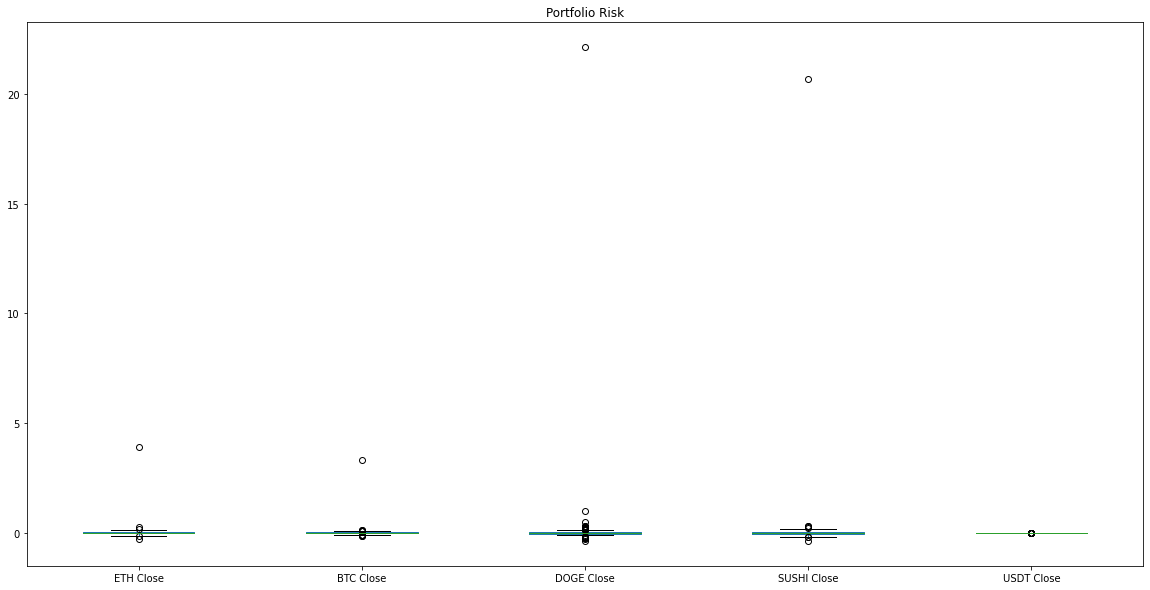

In [11]:
Crypto_Daily_Returns.plot.box(figsize=(20, 10), title="Portfolio Risk")
#doge  has the highest level of volatilty and USDT has the lowest one

<AxesSubplot:ylabel='Density'>

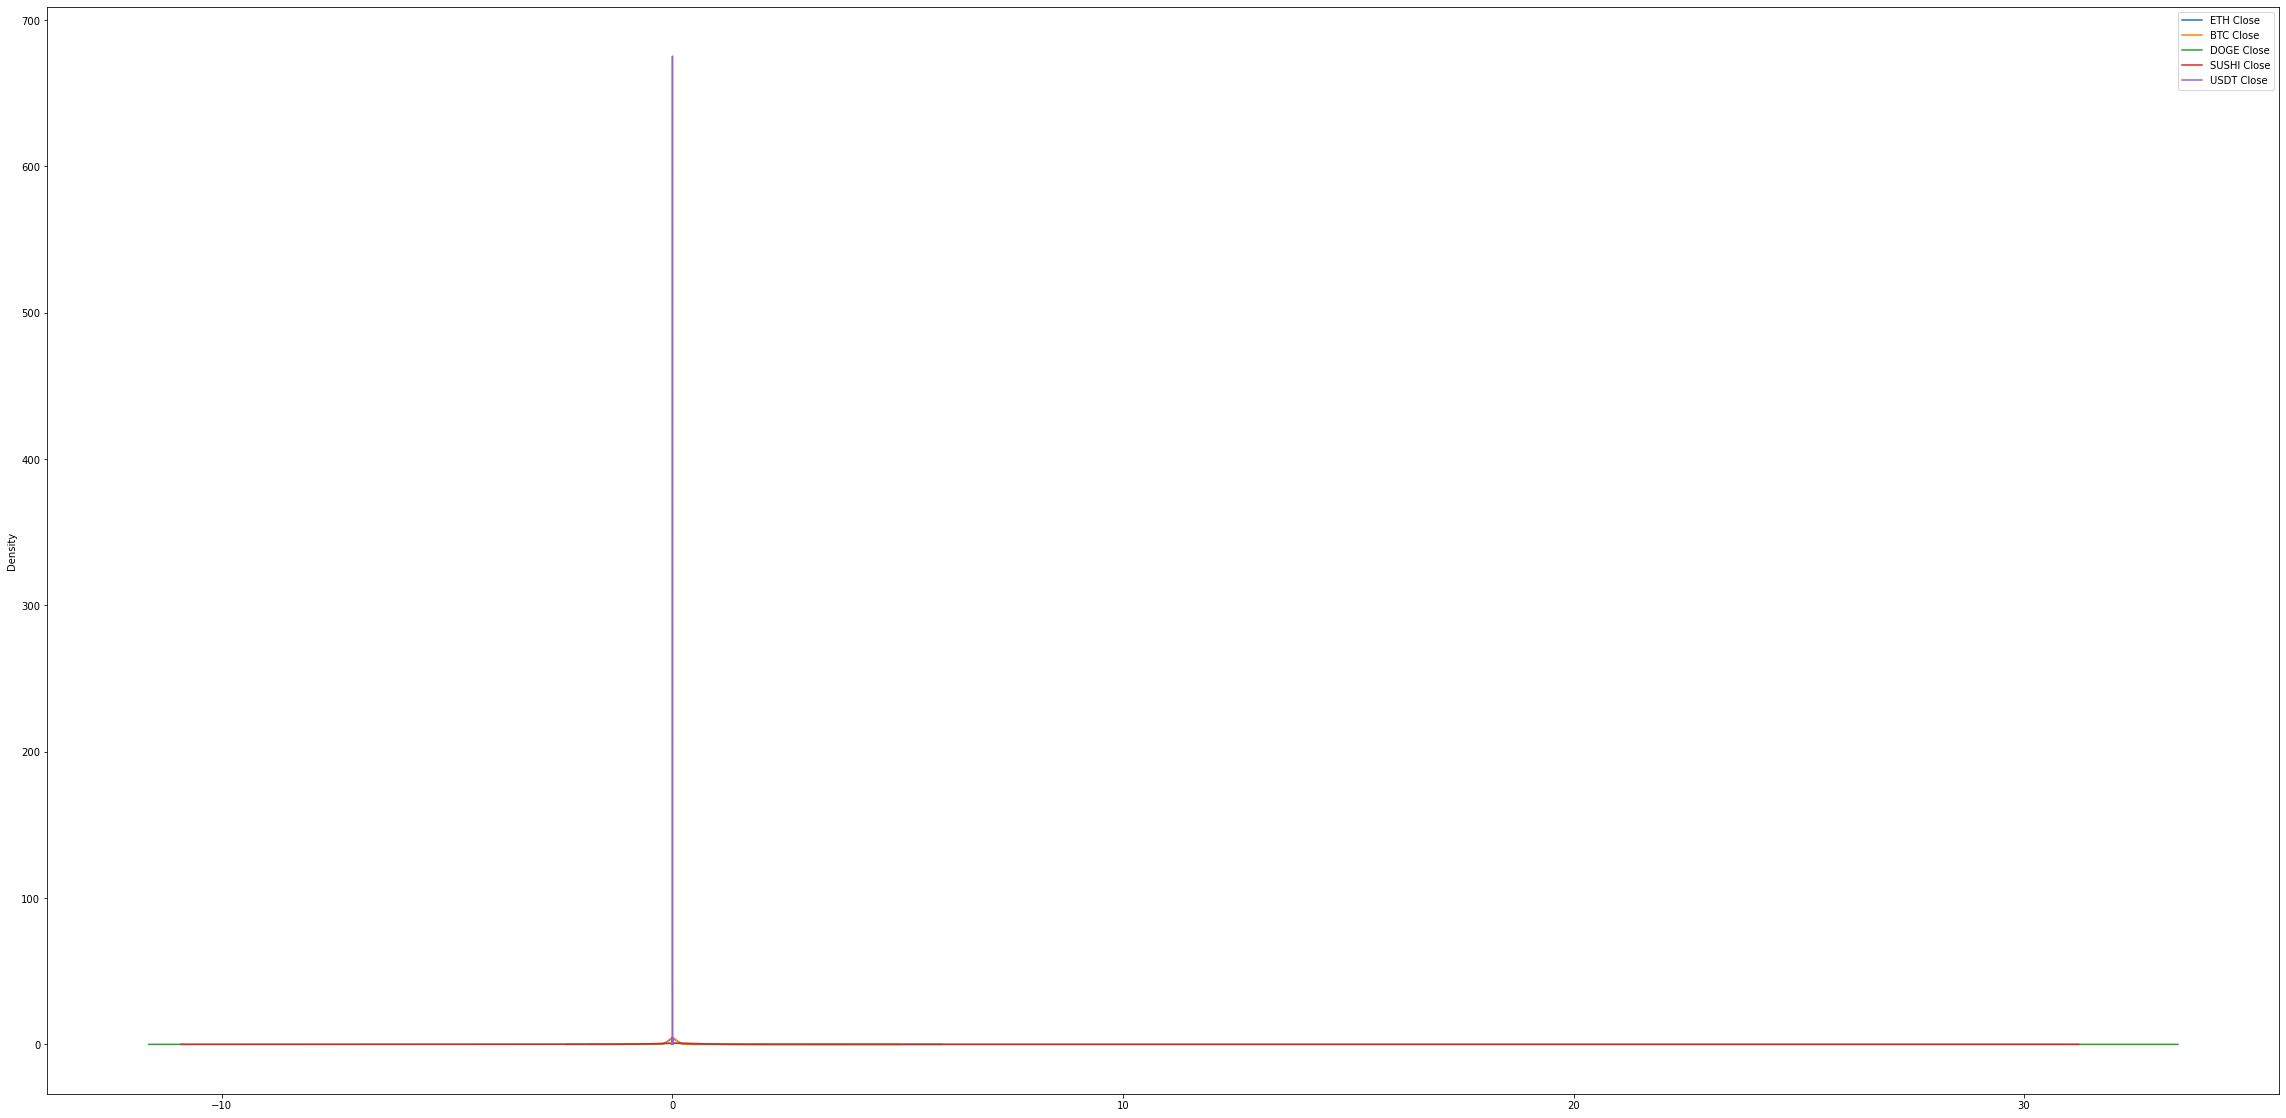

In [12]:
Crypto_Daily_Returns.plot.density(figsize=(40, 20))

In [13]:
annual_std = Crypto_Daily_Returns.std()* np.sqrt(365)
sharpe_ratios=(Crypto_Daily_Returns.mean()*365)/annual_std
sharpe_ratios
#comment

ETH Close      1.672663
BTC Close      1.447822
DOGE Close     1.487278
SUSHI Close    1.362872
USDT Close    -0.098438
dtype: float64

In [79]:
#df.hvplot.line(x=x_var,y=y_var,xlabel =x_label,ylabel =y_label,title=title,groupby=groupby)

test=volume_data#.groupby(['Date','ticker']).sum()
test['year-month']=test['Date'].str.slice(0,7,1)
test['year']=test['Date'].str.slice(0,4,1)
test

test.hvplot.line(x='Date',y='Volume',xlabel='Date',ylabel='Volume',title='Intraday Volume',by='ticker',figsize=(200,100),groupby='year')
#test2.hvplot.line(x='year-month',y='Volume',xlabel='Date',ylabel='Volume',title='Intraday Volume',by='ticker',figsize=(200,100))





BokehModel(combine_events=True, render_bundle={'docs_json': {'8658740b-1aac-490c-a0ae-21a625fc8b1a': {'defs': …

:DynamicMap   [year]
   :NdOverlay   [ticker]
      :Curve   [Date]   (Volume)

In [115]:
Trade_data.head()
Trade_data['year']=test['Date'].str.slice(0,4,1)

Trade_data.hvplot.line(x='Date',y='Total Traded',xlabel='Date',ylabel='Daily Traded Total',title='Intraday Traded',by='ticker',figsize=(200,100),groupby='year')

BokehModel(combine_events=True, render_bundle={'docs_json': {'b85eafc0-60a2-4e7e-8143-260f2a07abfd': {'defs': …

:DynamicMap   [year]
   :NdOverlay   [ticker]
      :Curve   [Date]   (Total Traded)

we can see that the volatility is related to the traded volume. the bigger coins have highest trading activities
----


In [ ]:
ether

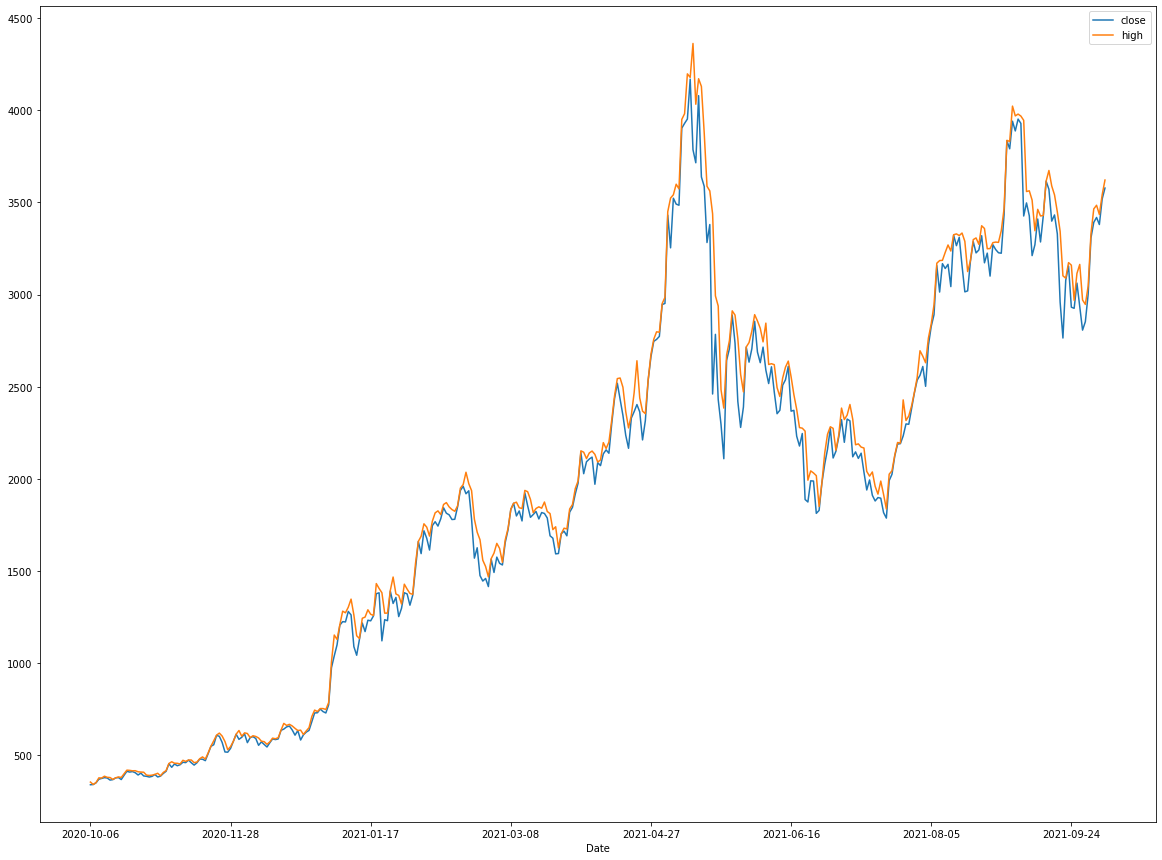

In [116]:
s_test= Crypto_data.loc[:,['ETH Close','ETH High']].dropna()
plt.figure(figsize=(20,15))

s_test['ETH Close'].plot(label='close')
s_test['ETH High'].plot(label='high')
plt.legend(loc='upper right')
plt.show()
